In [1]:
import csv
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
data = []
with open('C:/Users/User/Desktop/csv/PytorchGen-master/original_data/creditcard_1_train_no_label.csv') as csvfile:
    csv_reader = csv.reader(csvfile)  # 使用csv.reader讀取csvfile中的檔案
    birth_header = next(csv_reader)  # 讀取第一行每一列的標題
    for row in csv_reader:  # 將csv 檔案中的資料儲存到birth_data中
        data.append(row)

data = [[float(x) for x in row] for row in data]  # 將資料從string形式轉換為float形式

data = np.array(data)  # 將list陣列轉化成array陣列便於檢視資料結構

data
data.shape

(492, 30)

In [3]:
len(data)
import pandas as pd

df = pd.DataFrame(data)
df.columns = ['V14', 'V4', 'V10', 'V17', 'Time', 'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23']

df

,V14,V4,V10,V17,Time,V12,V26,Amount,V21,V8,...,V13,V25,V24,V18,V2,V1,V5,V15,V9,V23
0,-0.486750,0.289200,-0.282330,-0.393922,-0.247642,-0.310684,0.037754,-0.193722,0.094555,0.144351,...,-0.060452,0.008706,0.053636,-0.002294,0.135631,-0.128532,-0.043418,0.043066,-0.259929,-0.107764
1,-0.192397,0.165674,-0.085308,0.082249,-0.247328,-0.054504,-0.030431,0.189954,0.120816,-0.008240,...,0.068730,0.055245,-0.049243,0.210910,-0.221716,-0.168832,0.112307,0.221228,-0.025224,0.316836
2,-0.167245,0.168680,-0.155288,-0.664896,-0.228307,-0.701909,-0.114240,0.141734,-0.052941,-0.042885,...,0.002341,-0.030980,-0.014648,-0.320343,0.122150,-0.128043,-0.068195,-0.077324,-0.022153,0.039353
3,-0.768027,0.193941,-0.489101,-1.750109,-0.216275,-1.167150,-0.138471,0.056706,0.104797,-0.027163,...,0.018739,0.049827,-0.008980,-0.628238,0.094113,-0.243471,-0.093556,-0.000846,-0.023047,-0.101075
4,-0.689627,0.342310,-0.249236,0.934647,-0.213734,-0.493429,0.119810,-0.151326,-0.068375,-0.053049,...,0.148762,0.294409,-0.273575,0.372107,0.210310,0.066902,0.299673,-0.037555,-0.120257,-0.151948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.756022,0.126696,-0.569201,-0.635560,0.144855,-0.579770,0.166560,0.171350,0.142064,0.071744,...,-0.125453,0.106220,-0.049425,-0.161184,0.077837,-0.107352,-0.129828,0.044391,-0.193706,0.146979
488,-0.591118,0.102309,-0.329187,-0.454601,0.145833,-0.331741,0.156238,-0.159145,0.067903,0.024832,...,-0.080495,0.103129,-0.013595,-0.084495,0.089288,0.074855,0.036412,-0.067921,-0.105657,-0.034067
489,-0.460446,0.034121,-0.352799,-0.700090,0.145852,-0.297335,0.099624,0.073447,0.137200,0.125374,...,-0.042546,-0.146414,0.005359,-0.062283,0.077886,-0.038373,-0.092928,-0.078849,-0.061034,0.043554
490,-0.727853,0.131596,-0.534375,-0.641695,0.148783,-0.538410,0.128105,0.143008,0.106561,0.109542,...,-0.114516,-0.065012,-0.030788,-0.181131,0.040083,-0.172706,-0.069766,0.015584,-0.153077,-0.105665


In [4]:
print(len(df.values))
type(df.values)


492


numpy.ndarray

In [5]:
class Smote:
    def __init__(self,samples,N=10,k=5):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0
       # self.synthetic=np.zeros((self.n_samples*N,self.n_attrs))

    def over_sampling(self):
        N=int(self.N/100)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)
        print('neighbors',neighbors)
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            #print nnarray
            self._populate(N,i,nnarray)
        return self.synthetic


    # for each minority class samples,choose N of the k nearest neighbors and generate N synthetic samples.
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            if self.newindex != 492:
                self.newindex += 1
            elif (self.newindex == 492):
                self.newindex = 0

In [6]:
# a=np.array(df)
a = data
N_100_K_5=Smote(a,N=100,k=5)
N_100_K_5.over_sampling()

neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)


array([[-0.57510737,  0.2826001 , -0.29756949, ...,  0.01826314,
        -0.24027064, -0.07632061],
       [-0.20615292,  0.12851725, -0.13752438, ...,  0.17857551,
         0.02650277,  0.34390849],
       [-0.16724549,  0.16868026, -0.1552885 , ..., -0.07732387,
        -0.02215347,  0.03935308],
       ...,
       [-0.43449576,  0.15736519, -0.3602437 , ...,  0.08801035,
        -0.15522454,  0.01382196],
       [-0.72785331,  0.13159553, -0.5343746 , ...,  0.01558436,
        -0.15307746, -0.10566456],
       [-0.21781149,  0.01440061, -0.10859581, ..., -0.08799126,
         0.04595102,  0.0144514 ]])

In [7]:
N_100_K_8=Smote(a,N=100,k=8)
N_100_K_8.over_sampling()

neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius=1.0)


array([[-0.49450742,  0.27891003, -0.27007058, ...,  0.03957726,
        -0.24631014, -0.10081772],
       [-0.14146385,  0.14879927, -0.06527704, ...,  0.2272111 ,
        -0.02919192,  0.2547905 ],
       [-0.32692856,  0.23003009, -0.33355669, ..., -0.11620409,
        -0.17731867,  0.33912019],
       ...,
       [-0.45766183,  0.05416058, -0.32243095, ..., -0.066856  ,
        -0.07553048,  0.04160744],
       [-0.73218227,  0.14254182, -0.53354255, ...,  0.01302443,
        -0.16287256, -0.09169966],
       [-0.19295197,  0.06462292, -0.08608499, ..., -0.03133668,
         0.05459613, -0.02288203]])

In [8]:
N_150_K_10=Smote(a,N=150,k=10)
data_solve = N_150_K_10.over_sampling().copy()

neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)


In [9]:
print(data_solve.shape)

df00 = pd.DataFrame(data_solve)

df00.columns = ['V14', 'V4', 'V10', 'V17', 'Time', 'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23']


df00

(492, 30)


,V14,V4,V10,V17,Time,V12,V26,Amount,V21,V8,...,V13,V25,V24,V18,V2,V1,V5,V15,V9,V23
0,-0.483237,0.275322,-0.288486,-0.426915,-0.225379,-0.320337,0.027811,-0.189393,0.096268,0.140559,...,-0.067646,0.007456,0.044964,-0.010781,0.136920,-0.123099,-0.048049,0.044671,-0.251543,-0.098242
1,-0.061403,0.112674,-0.049606,0.031448,-0.120330,-0.070436,0.060252,0.189415,0.116094,-0.003392,...,-0.076730,-0.003217,-0.026668,0.154943,-0.167434,-0.114372,0.002434,0.188099,-0.018809,0.293829
2,-0.266790,0.149296,-0.190403,-0.694264,-0.181848,-0.628801,-0.115574,0.072074,0.011017,-0.048397,...,-0.026096,-0.021504,-0.006783,-0.273177,0.128186,-0.117217,-0.058786,-0.065264,-0.043914,0.016787
3,-0.919340,0.223508,-0.511821,-1.597868,-0.023936,-0.952170,0.058664,0.125662,0.142655,0.116499,...,-0.049102,0.034940,-0.005248,-0.543876,0.172344,-0.311062,-0.338357,0.173216,-0.113220,0.005412
4,-0.652473,0.337643,-0.195785,0.813034,-0.142098,-0.374178,0.094499,-0.142925,-0.056089,-0.046560,...,0.083489,0.230957,-0.214733,0.344377,0.187841,0.077388,0.261975,-0.070696,-0.135146,-0.115017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.741473,0.173164,-0.512815,-0.654774,0.106808,-0.589498,0.106916,0.078404,0.116753,0.084068,...,-0.125397,0.094951,-0.074352,-0.148119,0.131928,-0.101324,-0.094131,0.046824,-0.220673,0.061722
488,-0.582164,0.094094,-0.331274,-0.435696,0.138838,-0.317190,0.154356,-0.159145,0.067789,0.027521,...,-0.067807,0.099824,-0.012025,-0.076928,0.095579,0.064574,0.041574,-0.074951,-0.112222,-0.038984
489,-0.460446,0.034121,-0.352799,-0.700090,0.145852,-0.297335,0.099624,0.073447,0.137200,0.125374,...,-0.042546,-0.146414,0.005359,-0.062283,0.077886,-0.038373,-0.092928,-0.078849,-0.061034,0.043554
490,-0.727853,0.131596,-0.534375,-0.641695,0.148783,-0.538410,0.128105,0.143008,0.106561,0.109542,...,-0.114516,-0.065012,-0.030788,-0.181131,0.040083,-0.172706,-0.069766,0.015584,-0.153077,-0.105665


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

cols =['V14', 'V4', 'V10', 'V17', 'Time',]
#  'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23'
sns.pairplot(df00[cols], size=2.5)
plt.tight_layout()

plt.show()

C:\Users\User\.conda\envs\python3.6.8\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1250x1250 with 30 Axes>

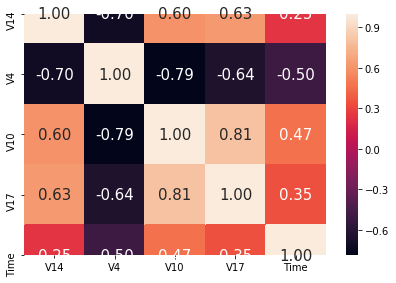

In [11]:
import numpy as np
cm = np.corrcoef(df00[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()

plt.show()

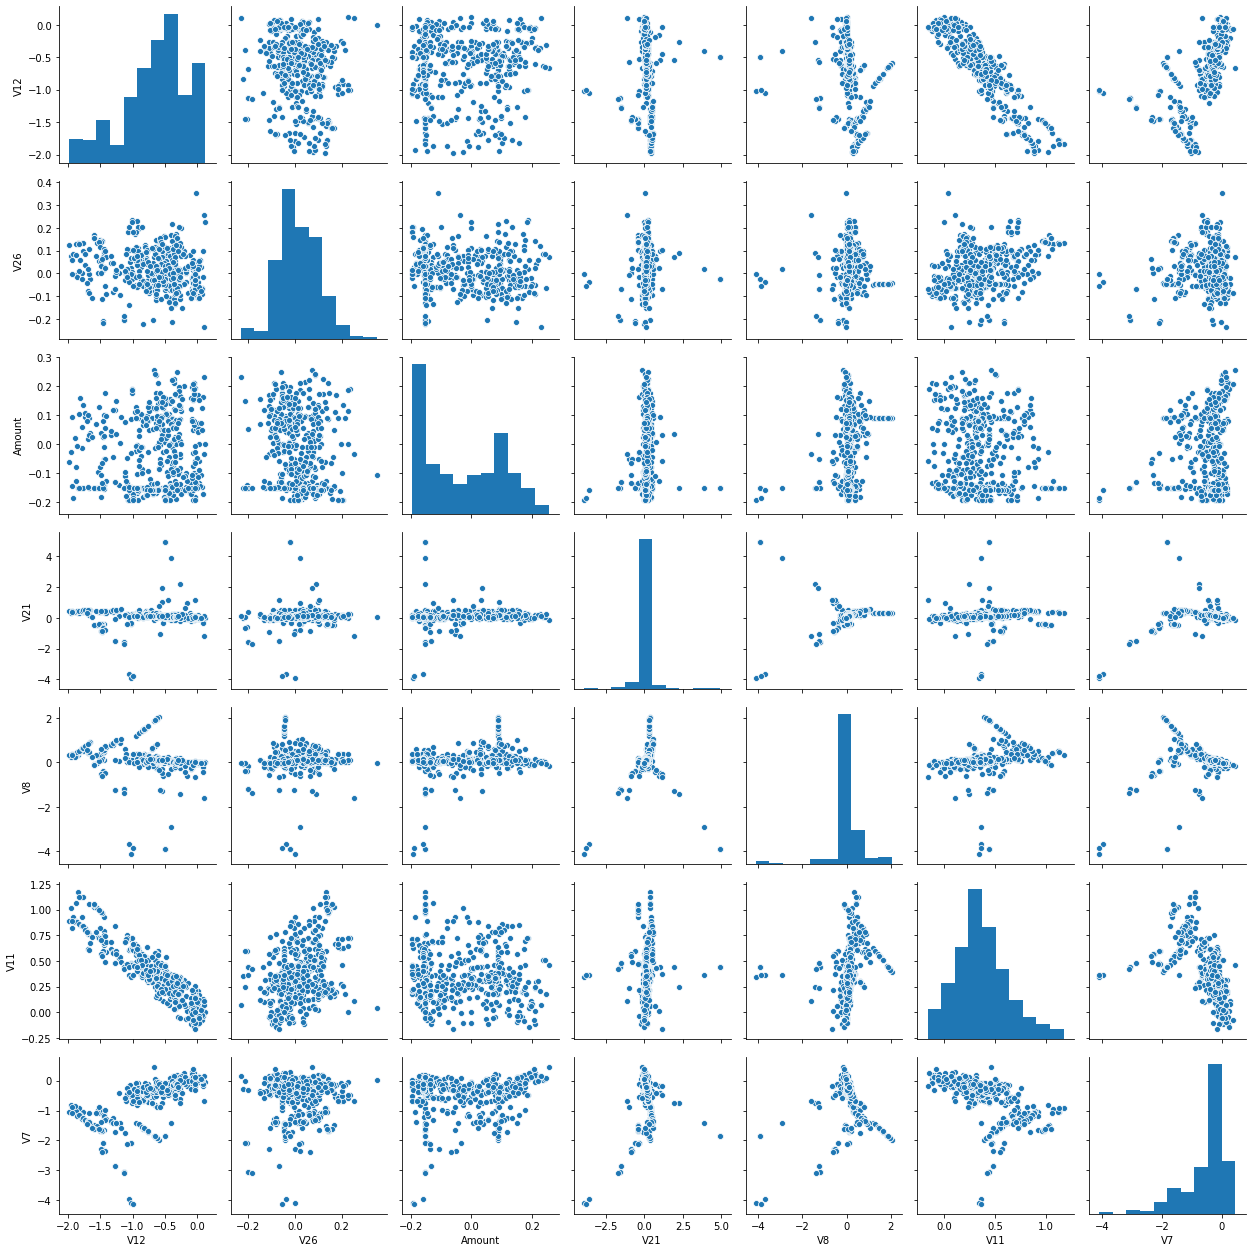

In [12]:
cols =['V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7']
# 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23'
sns.pairplot(df00[cols], size=2.5)
plt.tight_layout()

plt.show()

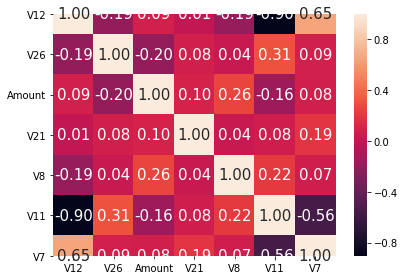

In [13]:
cm = np.corrcoef(df00[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()

plt.show()

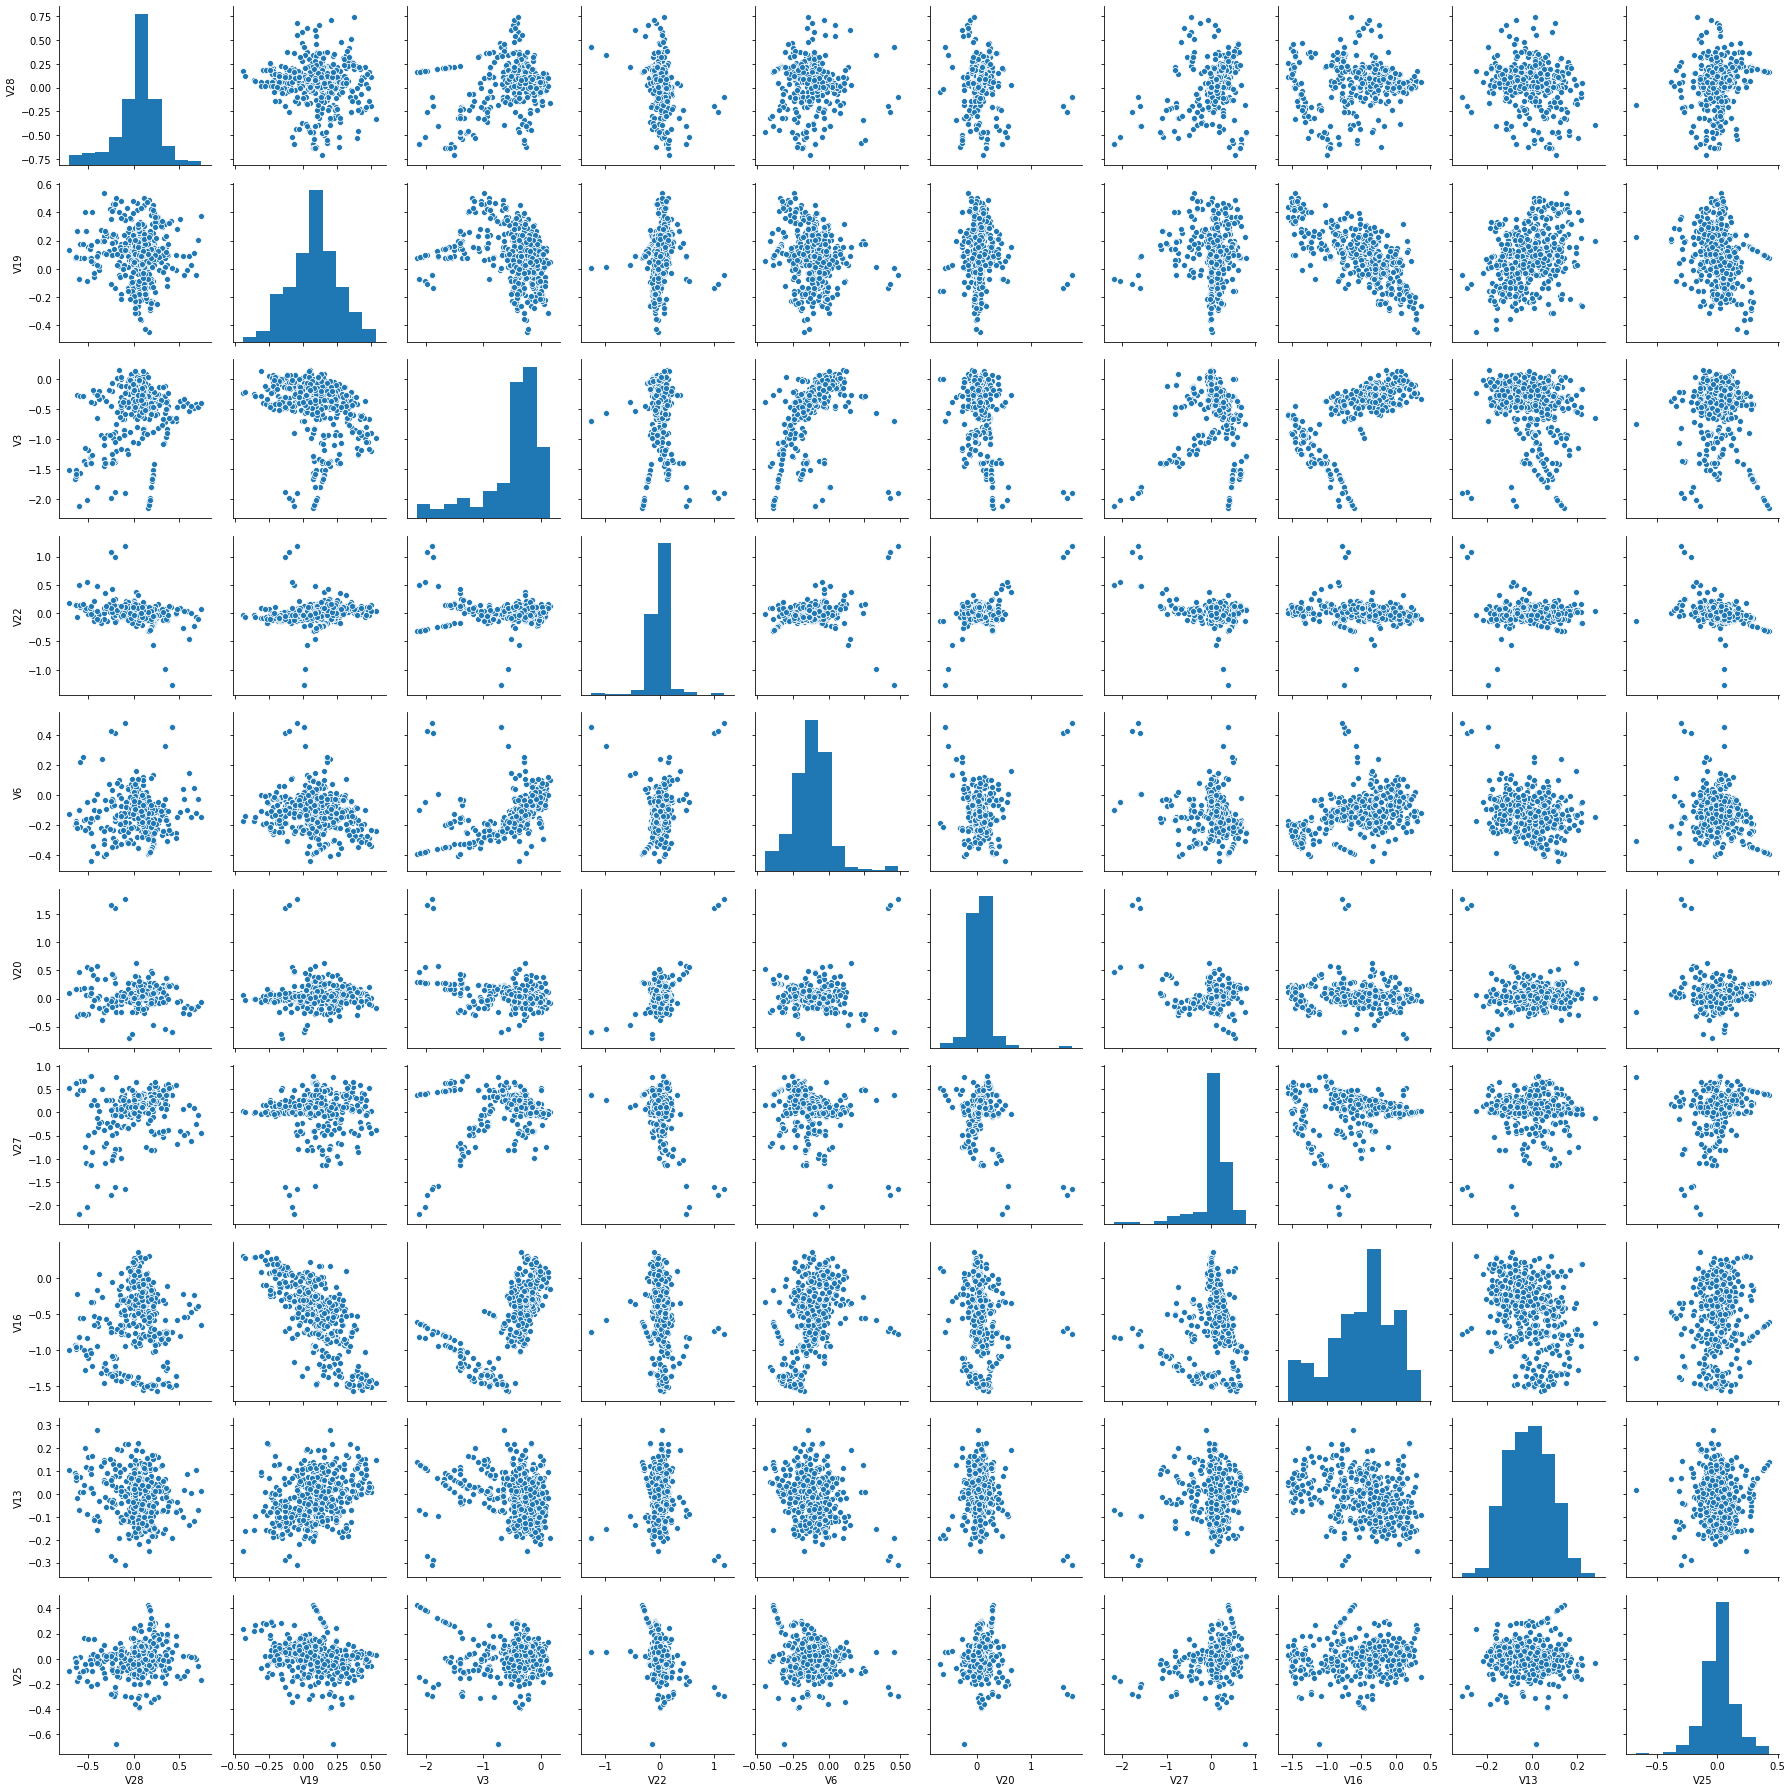

In [14]:
cols =['V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25']
# , 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23'
sns.pairplot(df00[cols], size=2.5)
plt.tight_layout()

plt.show()

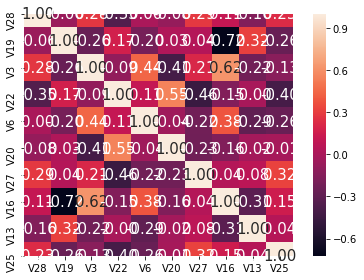

In [15]:
cm = np.corrcoef(df00[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()

plt.show()

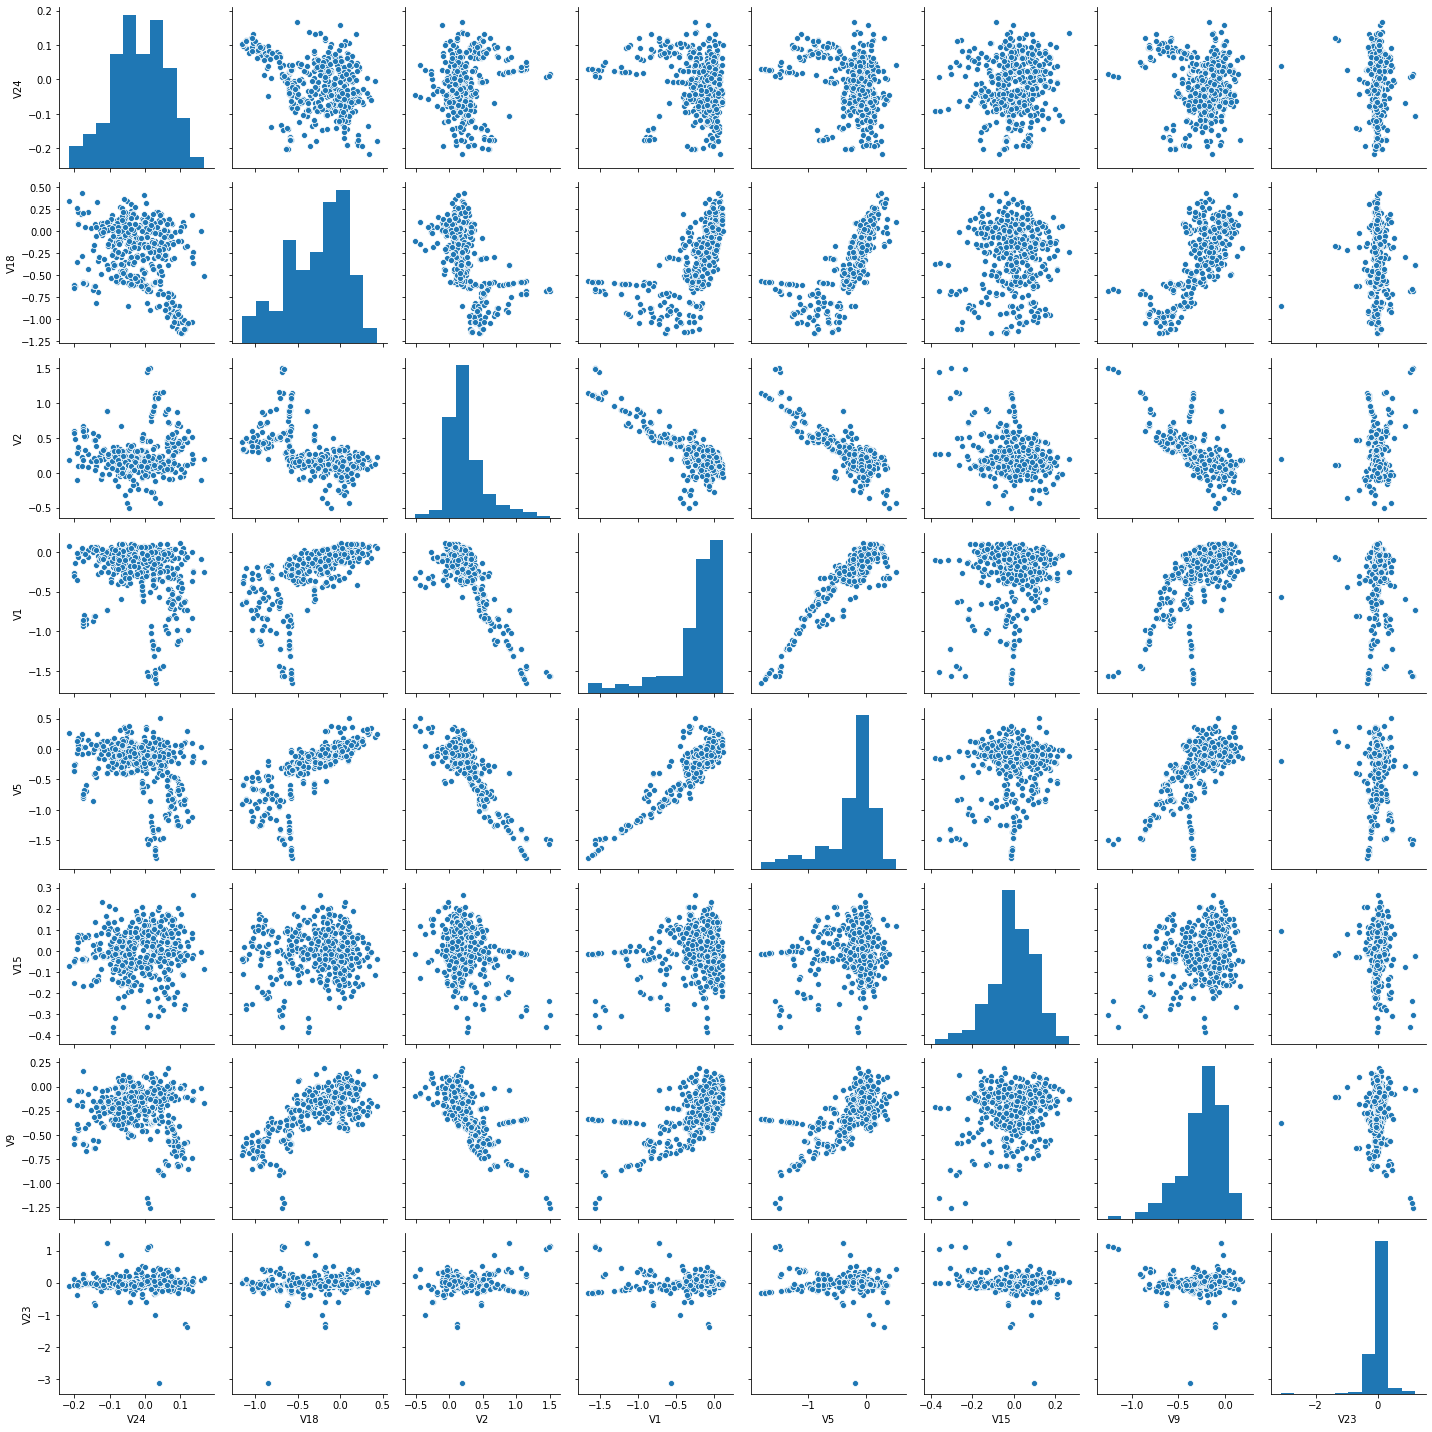

In [16]:
cols =['V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23']

sns.pairplot(df00[cols], size=2.5)
plt.tight_layout()

plt.show()

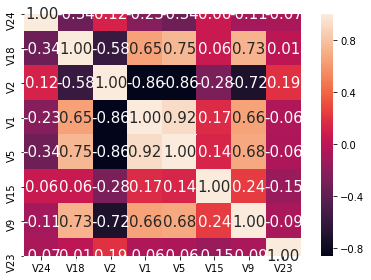

In [17]:
cm = np.corrcoef(df00[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()

plt.show()

In [18]:
data = []

In [19]:
for i in range((30000 // 492) + 1):
    N_150_K_10=Smote(a,N=150,k=10)
    data_solve = N_150_K_10.over_sampling().copy()
    data.append(data_solve)


neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_pa

neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_pa

In [20]:
print(len(data))
print(len(data[0]))

61
492


In [21]:
492* 61* 30



900360